![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/)

# Sarcasm Classification with NLU
![](https://camo.githubusercontent.com/0a466b438cfd4f2bc5248f5029cde1fb66dbdefc/68747470733a2f2f6d656d657362616d732e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031372f31312f7368656c646f6e2d7361726361736d2d6d656d652e6a7067)             
Knowing the difference between when somebody is serious or sarcastic can yield inisghts about users of social media plattforms like  Twitter, Reddit, Facebook, etc..     


NLU provides a classifier pretrained on [sarcasm dataset](https://arxiv.org/abs/1704.05579) consisting of 1.3 million sarcastic comments from the internet forum Reddit. 

The Sarcasm classifier model uses universal sentence embeddings and is trained with the classifierdl algorithm provided by Spark NLP.            
https://www.kaggle.com/danofer/sarcasm




In [1]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu > /dev/null    

In [2]:
# Download the dataset 
! wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv -P /tmp

--2020-11-09 08:02:27--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.225.91
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.225.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255268960 (243M) [text/csv]
Saving to: ‘/tmp/train-balanced-sarcasm.csv’

train-balanced-sarc 100%[===================>] 243.44M  38.4MB/s    in 6.3s    

2020-11-09 08:02:34 (38.9 MB/s) - ‘/tmp/train-balanced-sarcasm.csv’ saved [255268960/255268960]



In [3]:
import nlu
sarcasm_pipe  = nlu.load('en.classify.sarcasm')
sarcasm_pipe.predict('gotta love the teachers who give exams on the day after halloween')

classifierdl_use_sarcasm download started this may take some time.
Approximate size to download 21.5 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


,sentence,sentence_embeddings,sarcasm,sarcasm_confidence
origin_index,,,,
0,gotta love the teachers who give exams on the ...,"[-0.05071105435490608, 0.038035523146390915, 0...",sarcasm,0.999979


In [4]:
import pandas as pd
df = pd.read_csv('/tmp/train-balanced-sarcasm.csv')


In [5]:
sarcasm_pipe  = nlu.load('en.classify.sarcasm')
df['text'] = df['comment']
sarcasm_predictions = sarcasm_pipe.predict(df['text'].iloc[0:1000])
sarcasm_predictions

classifierdl_use_sarcasm download started this may take some time.
Approximate size to download 21.5 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
INFO: NLU will assume text as label column since default text column could not be find


,sentence,sentence_embeddings,sarcasm,sarcasm_confidence
origin_index,,,,
0,NC and NH.,"[-0.06570463627576828, -0.03522053360939026, -...",normal,1.000000
1,You do know west teams play against west teams...,"[-0.0254225991666317, 0.05448468029499054, -0....",normal,0.999997
2,"They were underdogs earlier today, but since G...","[-0.0035701016895473003, -0.030124755576252937...",normal,0.999999
3,"This meme isn't funny none of the ""new york ni...","[0.06464719027280807, -0.023972542956471443, -...",normal,0.999301
4,I could use one of those tools.,"[0.028676817193627357, 0.0199710875749588, 0.0...",normal,0.999977
...,...,...,...,...
995,Have you bound your pistol on mouse wheel?,"[-0.04123315587639809, 0.049579471349716187, -...",normal,1.000000
996,Imagine showing that to someone a little over ...,"[0.0263528935611248, -0.06056991219520569, -0....",normal,0.999891
997,I wish Schumer and Reid had not endorsed Keith...,"[0.07649341225624084, 0.05448545515537262, -0....",normal,0.998198


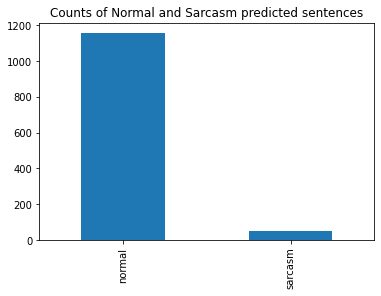

In [6]:
sarcasm_predictions.sarcasm.value_counts().plot.bar(title='Counts of Normal and Sarcasm predicted sentences')